In [1]:
import cv2 as cv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
import seaborn as sns
import math
from sklearn.cluster import DBSCAN

folder = '../Data/test/images'

for filename in os.listdir(folder):
    print(filename)

for filename in os.listdir(folder):
    img = cv.imread(os.path.join(folder,filename))
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    ret,thresh = cv.threshold(img,100,255,cv.THRESH_BINARY_INV)
    img_name = filename.replace("rgb", "msk")
    cv.imwrite(f"../Data/test/masks/{img_name}", thresh)

In [2]:
#img = cv.imread('wire.jpg')
img = cv.imread('../Data/sample images/1.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = cv.resize(img, (400, 400))

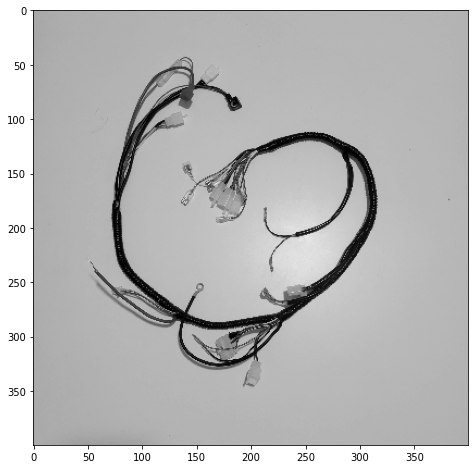

In [3]:
plt.subplots(figsize=(10,8)),plt.imshow(img, 'gray', vmin=0, vmax=255)
plt.show()

In [4]:
_,thresh2 = cv.threshold(img,100,255,cv.THRESH_BINARY_INV)

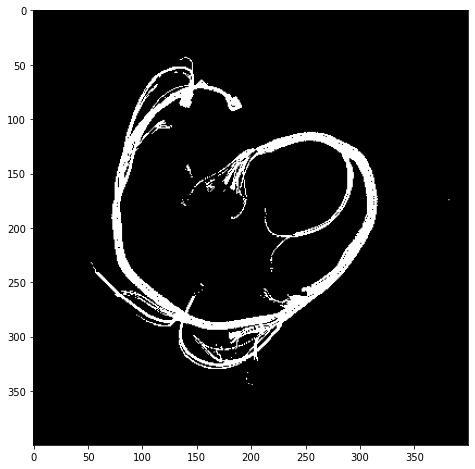

In [5]:
plt.subplots(figsize=(10,8)),plt.imshow(thresh2, 'gray')
plt.show()

contours, _= cv.findContours(thresh2, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

len(contours)

contours_clean = []
for c in contours:
    area = cv.contourArea(c)
    if area > 5.0:
        contours_clean.append(c)

len(contours_clean)

cont_index = np.array(areas).argmax()
wire_cont = contours[cont_index]

#new_mask = cv.drawContours(thresh2, [wire_cont], -1, color=(255, 255, 255), thickness=cv.FILLED)
new_mask = cv.drawContours(thresh2, contours_clean, -1, color=(255, 255, 255), thickness=cv.FILLED)

plt.subplots(figsize=(10,8)),plt.imshow(new_mask, 'gray')
plt.show()

In [6]:
points = np.transpose(np.nonzero(thresh2))

In [7]:
points

array([[ 43, 139],
       [ 43, 140],
       [ 43, 141],
       ...,
       [339, 196],
       [343, 198],
       [344, 201]], dtype=int64)

# Aglomerative Cluster

In [8]:
knn_graph = kneighbors_graph(points, 40, include_self=False)

In [9]:
clustering = AgglomerativeClustering(n_clusters=40, linkage="ward", connectivity=knn_graph)

In [10]:
clustering.fit(points)

AgglomerativeClustering(connectivity=<9241x9241 sparse matrix of type '<class 'numpy.float64'>'
	with 369640 stored elements in Compressed Sparse Row format>,
                        n_clusters=40)

In [11]:
clustering.labels_

array([ 7,  7,  7, ..., 22, 22, 22], dtype=int64)

In [12]:
df = pd.DataFrame(points)
df['cluster'] = clustering.labels_
df.columns = ['Y', 'X', 'clusters']
df['Y'] = (df['Y'] * (-1)) + 400

In [13]:
df

,Y,X,clusters
0,357,139,7
1,357,140,7
2,357,141,7
3,356,137,7
4,356,142,7
...,...,...,...
9236,67,197,22
9237,62,196,22
9238,61,196,22
9239,57,198,22


In [14]:
df['clusters'].unique()

array([ 7,  6, 35, 12, 36, 28, 10,  3, 16,  4, 34, 26,  1, 24, 23, 11, 31,
        9, 32, 20, 14, 37, 13, 30,  8, 39, 27, 33,  5, 25, 15, 21,  0, 18,
        2, 38, 17, 29, 19, 22], dtype=int64)

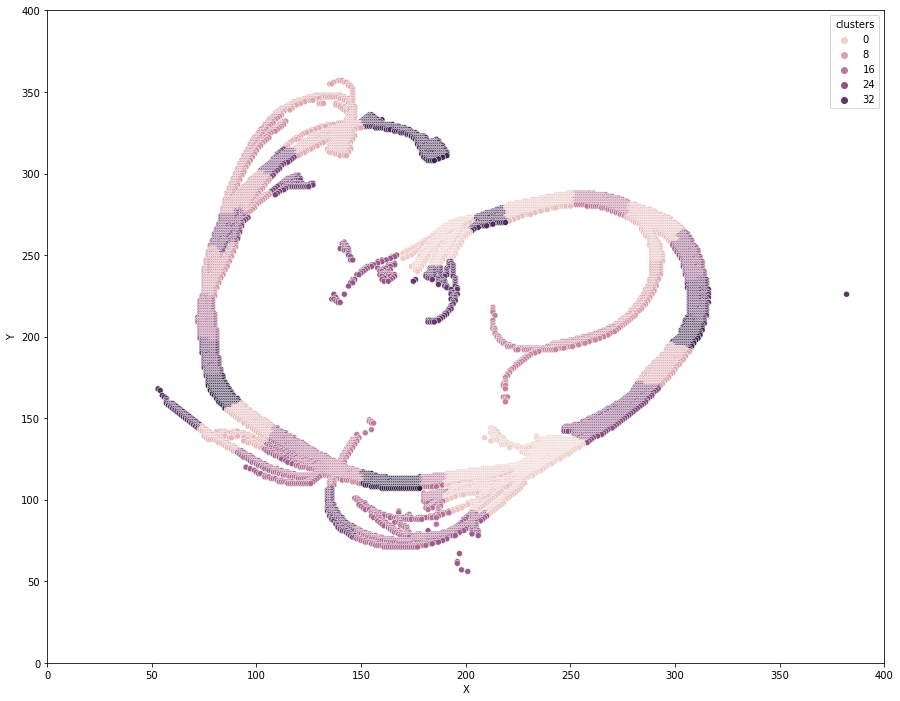

In [15]:
fig,ax = plt.subplots(figsize=(15,12))
sns.scatterplot(data=df, x="X", y='Y', hue="clusters", ax=ax)
_=ax.set_xlim(0,400)
_=ax.set_ylim(0,400)

# Density Cluster

In [16]:
eps = 0.5
min_samples = 50

In [17]:
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(points)

DBSCAN(min_samples=50)

In [18]:
labels = dbscan.labels_

In [19]:
print("Asignación de clusters:")
print(labels)

Asignación de clusters:
[-1 -1 -1 ... -1 -1 -1]


In [20]:
df2 = pd.DataFrame(points)
df2['cluster'] = dbscan.labels_
df2.columns = ['Y', 'X', 'clusters']
df2['Y'] = (df2['Y'] * (-1)) + 400

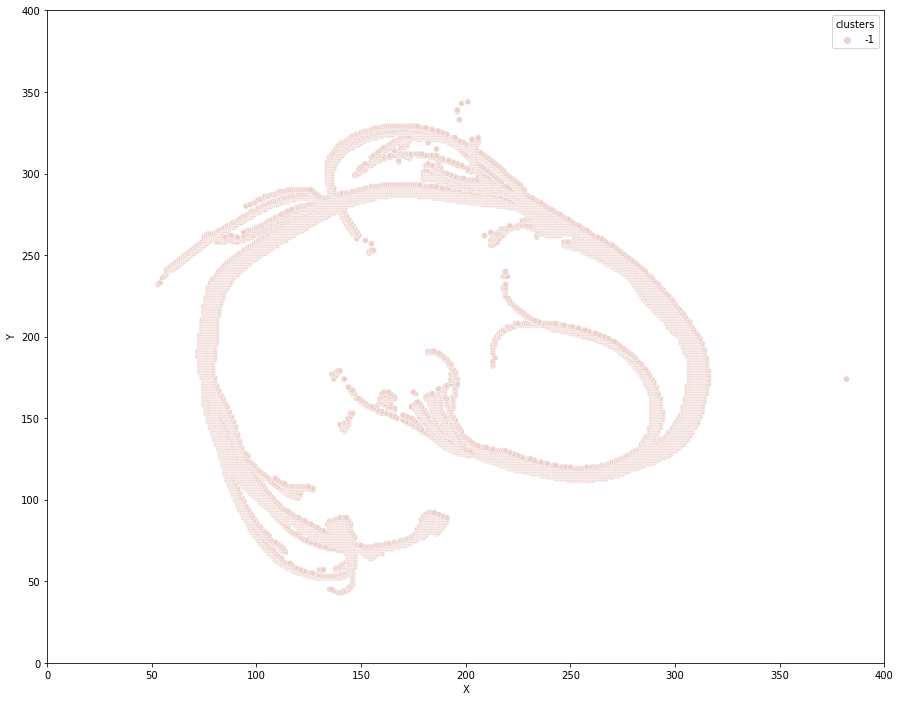

In [21]:
fig,ax = plt.subplots(figsize=(15,12))
sns.scatterplot(data=df2, x="X", y='Y', hue="clusters", ax=ax)
_=ax.set_xlim(0,400)
_=ax.set_ylim(0,400)